# Patna Weather  Data Analysis
##  - Hamid Omar

![title](https://www.holidify.com/images/cmsuploads/compressed/43955723280_e72f2cc6f9_b_20190116141518.jpg)

## The SQL query used to extract the data is included.
## The query runs without error and pulls the intended data. 


- SELECT * FROM city_list WHERE country = 'India';

- SELECT * FROM city_data WHERE city = 'Patna';

Once I have obtained the CSV file, I will now import python libraries in order to read the csv file as Pandas DataFrame. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline
pd.options.mode.chained_assignment = None

Below, I have imported the both the Datasets, I removed unnecessary columns from the Patna dataset, leaving only year,and average temperature. 

Looking at the shape of the dataset it is apparent that there are some missing values in the Patna dataframe, which we will have to remove in order to do further analysis.

In order to remove any inconsistencies in the dataset, and to make it easier to operate on them, I have merged the two, and later dropped all rows that carried Nan values. 

In [6]:
pat_dat = pd.read_csv("Patna Weather Data.csv")
glob_dat = pd.read_csv("Global Weather Data.csv")

In [7]:
pat_dat = pat_dat.loc[:,("year","avg_temp")]

In [8]:
print(pat_dat.shape,glob_dat.shape)

(218, 2) (266, 2)


In [9]:
new_df = pd.merge(pat_dat, glob_dat, on='year')

In [10]:
new_df = new_df.dropna(subset=["avg_temp_x","avg_temp_y"],axis=0)

## Moving averages are calculated to be used in the line chart.

I have created two new columns in the merged dataframe for each of the two moving averages(Patna and Global). 
 
I am calculating the moving average using a subset of three values at once, averaging them, and then moving the window by one element and repeating the process. This gives me SMA_x, simple moving average of Temperature in  Patna and SMA_y, simple moving average of Global Temperatures.

In [11]:
for i in range(0,new_df.shape[0]-2):
    new_df.loc[new_df.index[i+2],'SMA_x'] = ((new_df.iloc[i,1] + new_df.iloc[i+1,1] + new_df.iloc[i+2,1])/3)

In [12]:
for i in range(0,new_df.shape[0]-2):
    new_df.loc[new_df.index[i+2],'SMA_y'] = ((new_df.iloc[i,2] + new_df.iloc[i+1,2] + new_df.iloc[i+2,2])/3)

To plot the line graph, I have used matplotlib library in python.



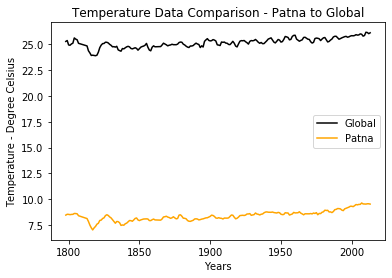

In [13]:
line1, = plt.plot(new_df.loc[:,"year"],new_df.loc[:,'SMA_x'],color="black")
line2, = plt.plot(new_df.loc[:,"year"],new_df.loc[:,'SMA_y'],color="orange")
plt.legend((line1,line2),("Global","Patna"))
plt.xlabel("Years")
plt.ylabel("Temperature - Degree Celsius")
plt.title("Temperature Data Comparison - Patna to Global")
plt.show()

# The student includes four observations about their provided data visualization.

1. Change of temperature in Patna correspond to Global trends.
2. Average temperature in Patna is approximately 17 degree Celsius higher as compared to the average Global Temperature.
3. Trends in the data suggests that the average temperature is increasing slowly but surely over the years.
4. There seems no prominent fluctutation in the Data(except one which is attributed to missing values).

# Key Consideration for Visualisation

1. Setting years as x-axis since it is a time series.
2. Setting Temperature as y-axis since it is the attribute of interest.
3. Coloring and labeling the plot lines for enhanced readability.
4. Labelling each axis as well as adding Title to graph to enhance readablility. 

# Final Conclusion

Temperatures are rising over time. 